# DSC630 PA - Final Project
## Bellevue University
### Winter Term- 2021
# Walmart Sales Forecasting
### Nitin Mahajan | Ganesh Kale

## Overview - 

Sales Forecasting is the process of using a company’s sales records over the past few years to predict the short-term or long-term sales performance of the company in the future. This is one of the pillars of proper financial planning. Sales forecasting is a globally conducted corporate practice where number of objectives are identified, action-plans are chalked out as well as budgets and resources are allotted to them. Here in this project, we are going to build the Sales Forecast Model that would learn from the past sales records, events and predict the accurate sales so company will be ready to source appropriate resources before the actual event happens.
The Sales Forecast Model will be machine learning model built using python, trained, and tested on Walmart sales data, the CRSP-DM methodology is used to complete this project. Sales Forecast Model is trained using different Machine Learning algorithms such as Linear Regression, Decision Tree, Random Forest, and Gradient Boosting (XGBoost) and model with highest accuracy score is baselined to predict the sales forecast in real time.
The factors considered to build the model and findings about the data with the detailed use cases and technical information is provided in the paper. 

## Background - 

Walmart, Inc. is part of the retail and wholesale business and is based in Bentonville, Arkansas. The President, Chief Executive Officer, and Director is C. Douglas McMillon. Walmart operates Walmart, Walmart Neighborhood Market, Wal-Mart, Walmart.com, and Sam’s Club. Retail companies commonly have issues with predicting sales accurately throughout the days, months, and years ahead. There are many varying factors that can cause issues with predicting sales such as holidays, economic factors, temperature, fuel prices, Consumer Price Index (CPI), and unemployment. Sales are the lifeblood of business. With an accurate sales forecast in hand, one can plan wisely. If the varying factors are not predicted correctly, then there could be staffing issues at stores, financial implications, and the business could become obsolete if customer satisfaction goes down. 
	
   Business Sales Executives often find themselves scrambling for answers when it comes to sales forecasting during business reviews with their leaderships team. The Sales Forecast Model will help sales executives to find such answers upfront and be ready with numbers and predictions to share with leaderships team. This model would help individual stores to upscale their customer satisfaction by stocking the right products at right time and decrease overstocking and wastage of food products. 

## 1.2.	Problem Statement - 

The goal of this analysis is to predict future sales for the Walmart stores based on the varying features and events mentioned in the introduction.
In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

* Build the Machine Learning model that would learn from past records and predict the accurate outcomes.
* Predict the Sales forecast for Store and its departments on specific week of the year.


## Data Info - 

The data ranges from February 5, 2010, through November 1, 2012. This file contains anonymized information about the 45 stores, indicating the type and size of store.

stores.csv:  This file contains anonymized information about the 45 stores, indicating the type and size of store.

* Store - Store number, numerical value
* Type - Type of Store, either A/B/C, categorical value
* size - The size of store, numerical value
    
train.csv: This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file we will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales - sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

features.csv: This file contains additional data related to the store, department, and regional activity for the given dates. 

It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. Markdown data is only available  after Nov 2011 and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week


#### _import packages_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

#### _Load data sets_

In [2]:
# load each csv file into separate dfs

train_df = pd.read_csv("Data/train.csv")

features_df = pd.read_csv("Data/features.csv")

stores_df = pd.read_csv("Data/stores.csv")

In [3]:
# display head of each df

train_df.shape
train_df.head()

print(40*'--')

features_df.shape
features_df.head()

print(40*'--')

stores_df.shape
stores_df.head()

(421570, 5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


--------------------------------------------------------------------------------


(8190, 12)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------------------------------------


(45, 3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## Data Prepration:

* Merge data - Features and store
* Add features & store info to train and test df
* Format features data types
* Feature Engineering
* Handling Missing values

In [4]:
# create new df from features_df and store_df

feature_store = features_df.merge(stores_df, how='left', on = 'Store')

In [5]:
# merge feature_store df into train

train = train_df.merge(feature_store,how='inner',on=['Store','Date','IsHoliday'])

In [6]:
# statistical summary 

train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### _Insights:_
Based on above statistical summary we see that Weekly_sales have minimum value as negative number and sales values cannot be negative, profit margin can be negative but sales, so it seems data issue, we are going to remove that record from the dataset.

In [7]:
# remove negative sales values from the dataset

train = train.loc[train['Weekly_Sales']>0]
train.reset_index(drop=True,inplace=True)

In [8]:
# display info of train and test dfs

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     150181 non-null  float64
 8   MarkDown2     110904 non-null  float64
 9   MarkDown3     136651 non-null  float64
 10  MarkDown4     134518 non-null  float64
 11  MarkDown5     150929 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.5+ MB


### _Insights:_
Based on above information, we see that the Date feature type is object, we need to change it to date and create new columns week and year from it.

In [9]:
# change data type of Date feature to date and create two new features from it - year and week

train['Date'] = pd.to_datetime(train.Date)


# new columns from data field

train['year'] = train.Date.dt.year

train['week'] = train.Date.dt.isocalendar().week

In [10]:
# display info and head of train and test dfs

train.info()

print(40*'--')

train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5


#### Missing values:

* find the missing values from the datasets
* handle the missing values

<AxesSubplot:>

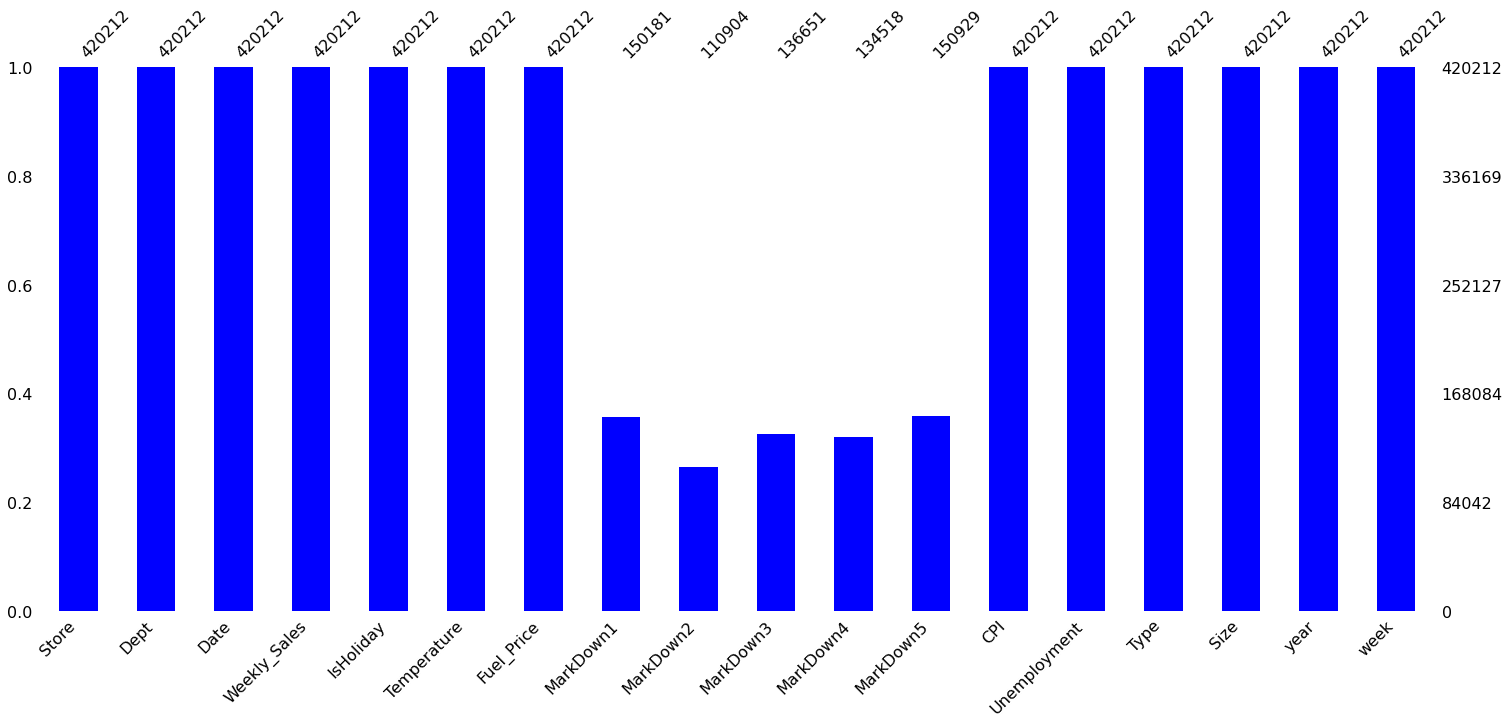

In [11]:
# display bar charts of missing values

msno.bar(train,color ='b')

In [12]:
# null values percentage

train.isna().sum()/train.shape[0]*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.260659
MarkDown2       73.607608
MarkDown3       67.480462
MarkDown4       67.988063
MarkDown5       64.082654
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
year             0.000000
week             0.000000
dtype: float64

### _Insights:_

Based on above bar chart and % data about null/na values in the data set we see that all the features are having values except markdown features.The markdowns are not running all the times at all the stores because this we see lots of null values and percentage is above 65%.
We are going to fill na values of all of these markdowns with 0s in both of the datasets - train and test.

In [13]:
#  fill na with 0 for markdown features

from statistics import mean

train['MarkDown1'] = train['MarkDown1'].fillna(value=0)
train['MarkDown2'] = train['MarkDown2'].fillna(value=0)
train['MarkDown3'] = train['MarkDown3'].fillna(value=0)
train['MarkDown4'] = train['MarkDown4'].fillna(value=0)
train['MarkDown5'] = train['MarkDown5'].fillna(value=0)

In [14]:
# sort the data by Date 

train = train.sort_values(by='Date',ignore_index=True)
train.shape
train.head()
train.tail()

(420212, 18)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,5
1,35,3,2010-02-05,14612.19,False,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,B,103681,2010,5
2,35,4,2010-02-05,26323.15,False,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,B,103681,2010,5
3,35,5,2010-02-05,36414.63,False,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,B,103681,2010,5
4,35,6,2010-02-05,11437.81,False,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,B,103681,2010,5


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week
420207,34,14,2012-10-26,8930.71,False,57.95,3.514,1151.88,68.01,3.0,392.12,1468.81,131.193097,8.839,A,158114,2012,43
420208,34,16,2012-10-26,4841.81,False,57.95,3.514,1151.88,68.01,3.0,392.12,1468.81,131.193097,8.839,A,158114,2012,43
420209,34,17,2012-10-26,7035.13,False,57.95,3.514,1151.88,68.01,3.0,392.12,1468.81,131.193097,8.839,A,158114,2012,43
420210,34,20,2012-10-26,2124.60,False,57.95,3.514,1151.88,68.01,3.0,392.12,1468.81,131.193097,8.839,A,158114,2012,43
420211,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,43


## Exploratory Data Analysis:

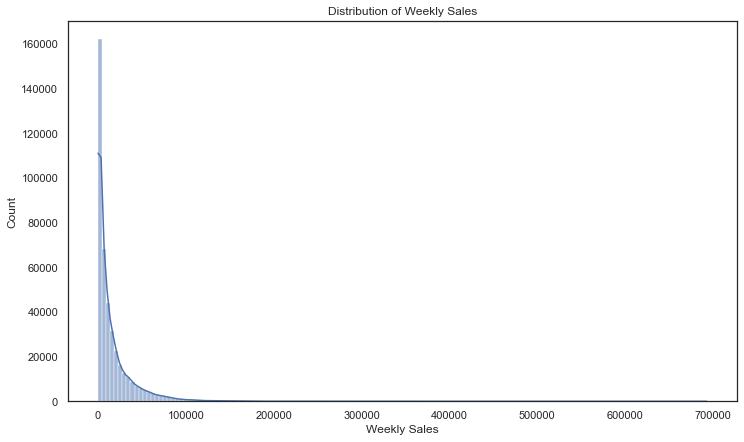

In [15]:
# distribution of sales price

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.histplot(data=train, x='Weekly_Sales',kde=True,bins=150)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count');

#### _Insights:_

Based on above distribution of weekly sales data is right skewed or positve skewed. It seems the weekly sales are higher in very few weeks of the year but most of the weeks weekly sales are less than mean.

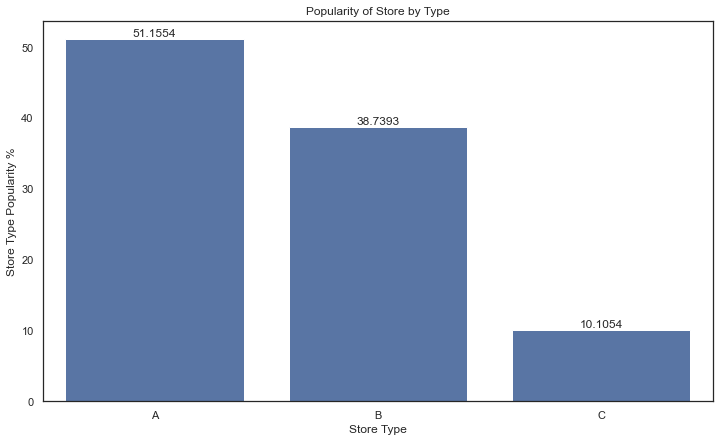

In [16]:
# store type and its popularity

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(x=train.Type.value_counts(normalize=True).keys(),y=train.Type.value_counts(normalize=True).values*100, color='b')
plt.title('Popularity of Store by Type')
plt.xlabel('Store Type')
plt.ylabel('Store Type Popularity %')
ax.bar_label(ax.containers[0]);

### _Insights:_

    Based on above bar charts, we see that Store Type 'A' is more popular than store types 'B' and 'C'. Store Type 'C' is the least popular store among them.

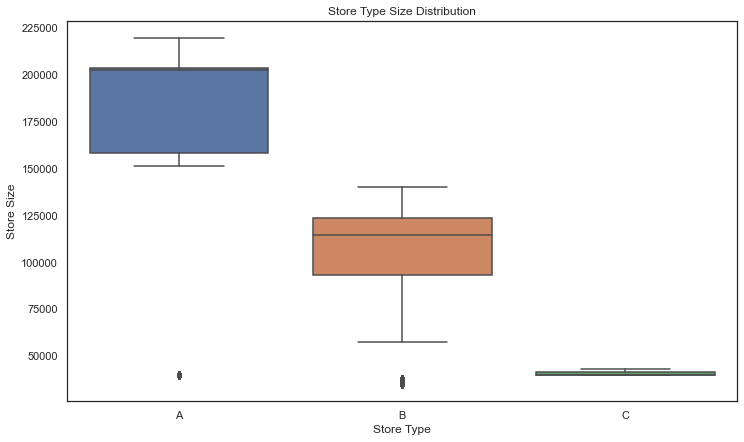

In [17]:
# store types by size distribution

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.boxplot(data=train,x='Type',y='Size')
plt.title('Store Type Size Distribution')
plt.xlabel('Store Type')
plt.ylabel('Store Size');

#### _Insights:_

Based on above box plot , we see that Store Type A median size is quite larger than other stores types, so it bigger in size than other two stores. Store Type C seems very small stores with max size less than 50K.

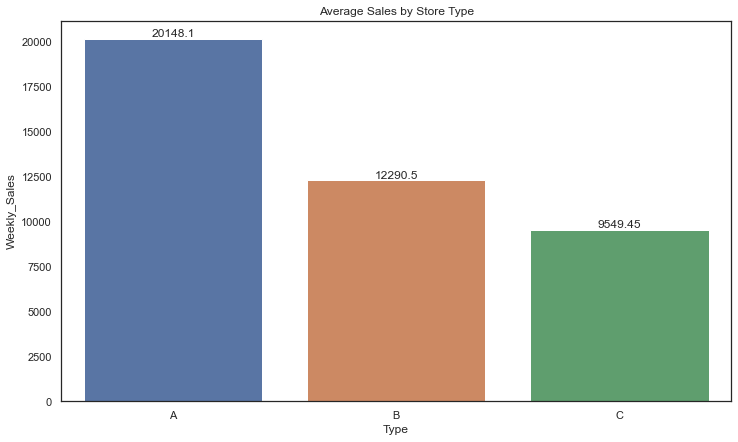

In [18]:
# store type wise average sales

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = train.groupby('Type',as_index=False)['Weekly_Sales'].mean(),x='Type',y='Weekly_Sales')
plt.title('Average Sales by Store Type')
ax.bar_label(ax.containers[0]);

### _Insights_:

Above Bar charts shows the average sales by store type for entire period of time(data availability), Since store type 'A' is more popular having higher average sales compared to other two store types.
Based on this we see that as the popularity more higher the sales.

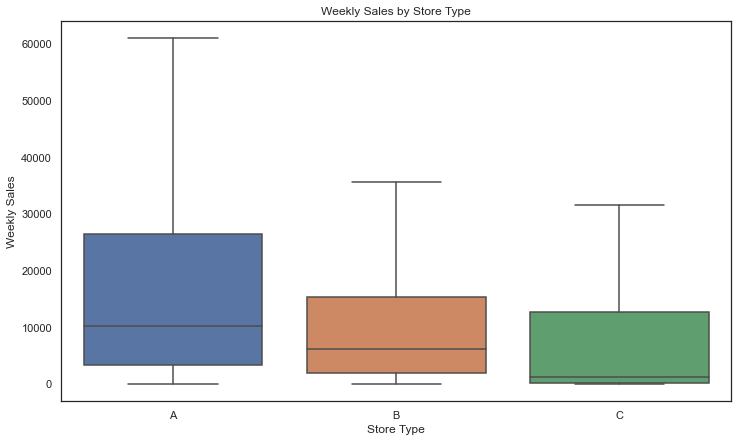

In [19]:
# Weekly sales of store types distribution

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.boxplot(data=train,x='Type',y='Weekly_Sales',showfliers=False)
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales');

#### _Insights:_

The above box plot shows that median weekly sales for Store Type A is higher than other two Store Types B & C. We can say that Store larger in size having higher median weekly sales. It seems that store B & C 75 percentile weekly sale is less than 60 percentile of Store Type A.

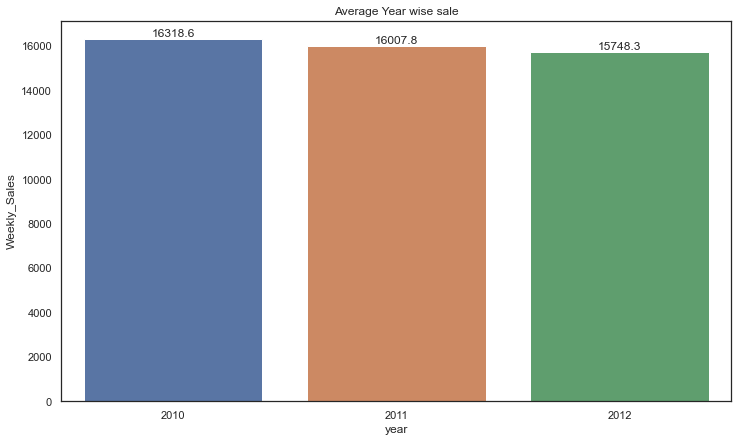

In [20]:
# average weekly sales year wise

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = train.groupby('year',as_index=False)['Weekly_Sales'].mean(),x='year',y='Weekly_Sales')
plt.title('Average Year wise sale')
ax.bar_label(ax.containers[0]);

### _Insights_:
Above bar chart shows that the year 2010 and 2011 the sales were almost same and in year 2012 sales got bit down.

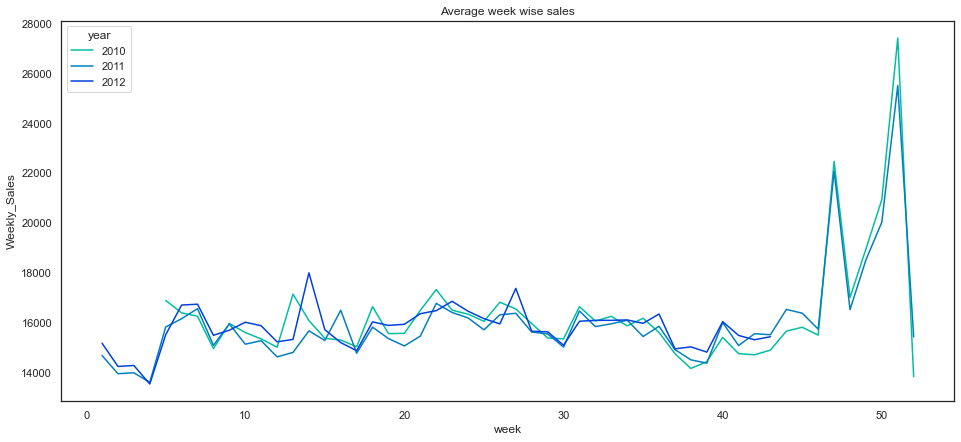

In [21]:
# average weekly sales by year

sns.set(style='white')
plt.figure(figsize=(16,7))
palette = sns.color_palette("winter_r", 3)
ax = sns.lineplot(data = train.groupby(['year','week'],as_index=False)['Weekly_Sales'].mean(),x='week',y='Weekly_Sales',hue='year',palette=palette)
plt.title('Average week wise sales');

### _Insights:_
On weekly basis the week of Thanksgiving holiday and one week before Christmas witnessed the highest sales for the years 2010 and 2011.
In 2012 the week no. 14 recorded the highest sales as compared to other weeks of the year but that doesn't corresponds to any holiday or any special event

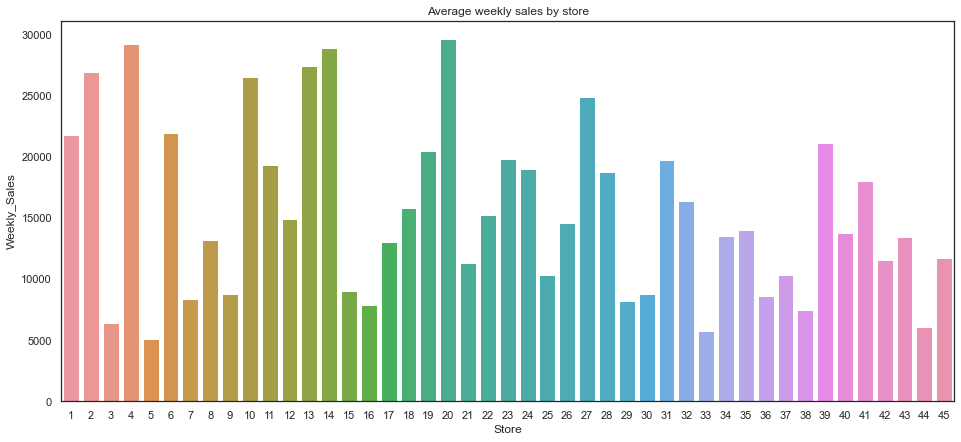

In [22]:
# average sales by store

sns.set(style='white')
plt.figure(figsize=(16,7))
palette = sns.color_palette("winter_r", 3)
ax = sns.barplot(data = train.groupby(['Type','Store'],as_index=False)['Weekly_Sales'].mean(),x='Store',y='Weekly_Sales')
plt.title('Average weekly sales by store');

### _Insights:_
The sales vary by large amount among the 45 stores.
It really depends which category of store it is and which week of the particular year is under consideration.

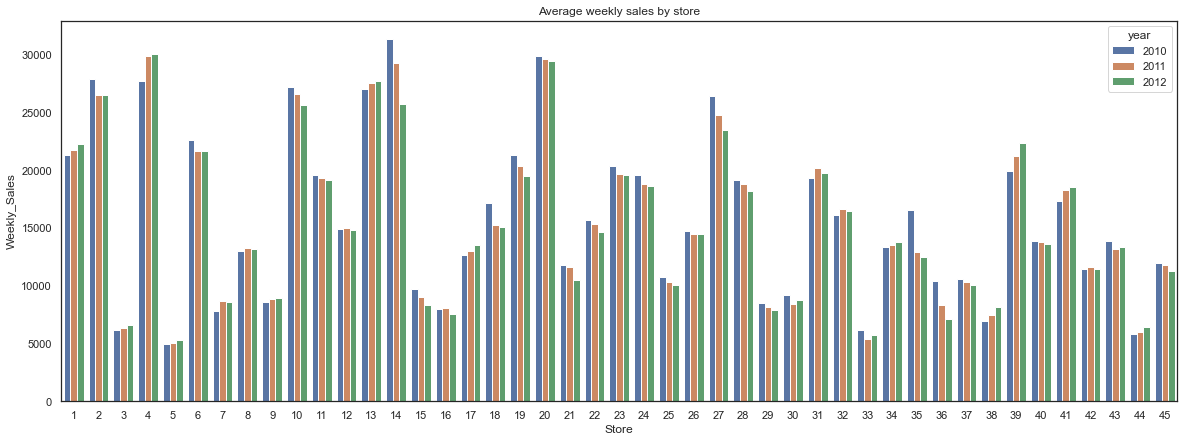

In [23]:
# average sales of store by year

sns.set(style='white')
plt.figure(figsize=(20,7))
ax = sns.barplot(data = train.groupby(['year','Store'],as_index=False)['Weekly_Sales'].mean(),x='Store',y='Weekly_Sales',hue='year')
plt.title('Average weekly sales by store');

### _Insights:_
The overall trend of store sales over the 3 years remains the same as it depends on the type of store and its size.

The stores 2,4,10,13,14 and 20 showed the highest sales in all the 3 years

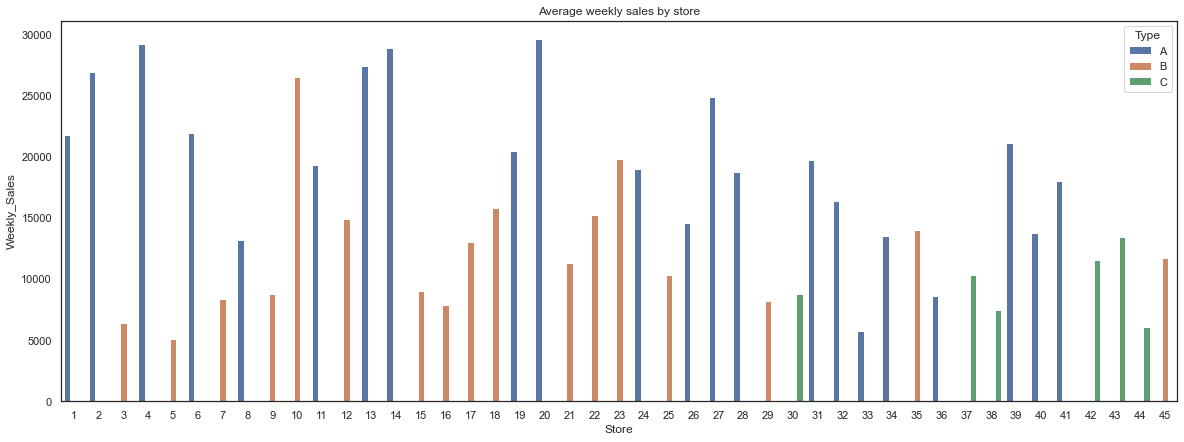

In [24]:
# average sales of store by year

sns.set(style='white')
plt.figure(figsize=(20,7))
ax = sns.barplot(data = train.groupby(['Type','Store'],as_index=False)['Weekly_Sales'].mean(),x='Store',y='Weekly_Sales',hue='Type')
plt.title('Average weekly sales by store');

#### _Insights:_

Since the Store Type A is larger in size and numbers, the weekly sales values are higher also compared to other two store ttypes.

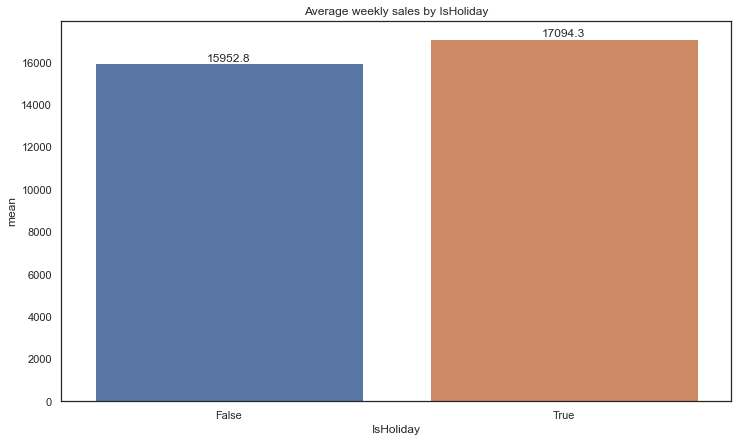

In [25]:
# average sale by holidays

data = train.groupby('IsHoliday',as_index=False)['Weekly_Sales'].agg(['mean','count']).reset_index()
sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = data,x='IsHoliday',y='mean')
plt.title('Average weekly sales by IsHoliday')
ax.bar_label(ax.containers[0]);

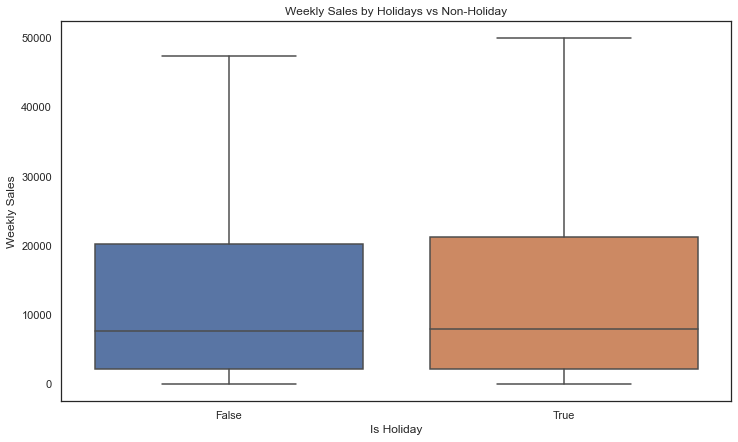

In [26]:
# Weekly sales on Holidays vs non-holidays

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.boxplot(data=train,x='IsHoliday',y='Weekly_Sales',showfliers=False)
plt.title('Weekly Sales by Holidays vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales');

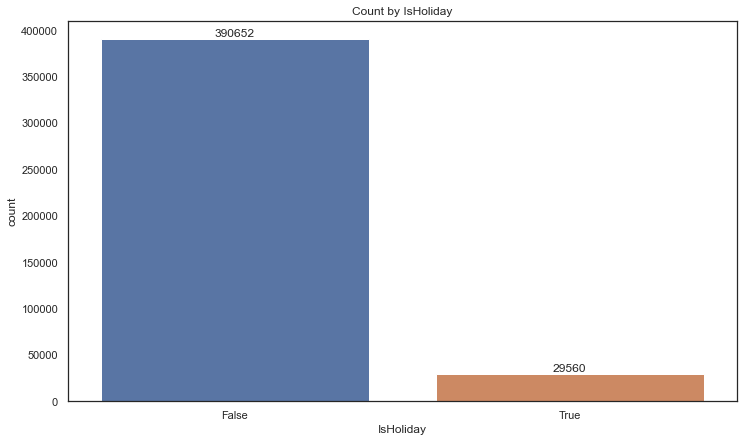

In [27]:
# Count by holidays

data = train.groupby('IsHoliday',as_index=False)['Weekly_Sales'].agg(['mean','count']).reset_index()
sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = data,x='IsHoliday',y='count')
plt.title('Count by IsHoliday')
ax.bar_label(ax.containers[0]);

### _Insights:_
Only 7 percent of the weeks in the data are the holiday weeks.

Despite being the less percentage of holiday weeks the sales in the holiday’s week are on the average higher than in the non-holiday weeks.

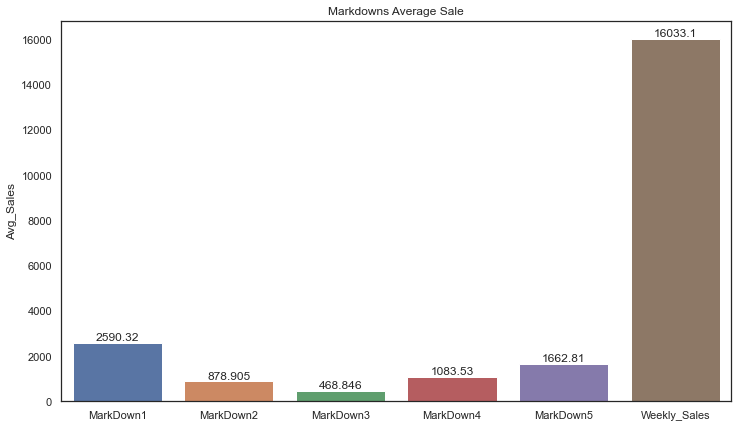

In [28]:
# average Sales by Markdowns

d = pd.DataFrame(train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']].mean(),columns=['Avg_Sales'])
sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = d, x=d.index, y='Avg_Sales')
plt.title('Markdowns Average Sale')
ax.bar_label(ax.containers[0]);

### _Insights:_

The markdowns average sales is much lower compared to weekly sales, we do not see any significance using these values as the overall markdowns average sale is lower than weekly average sale so we are going to remove these features from datasets.

In [29]:
# change the Type to numerical dtype

storetype_values = pd.get_dummies(train.Type)
train = pd.concat([train,storetype_values],axis=1)

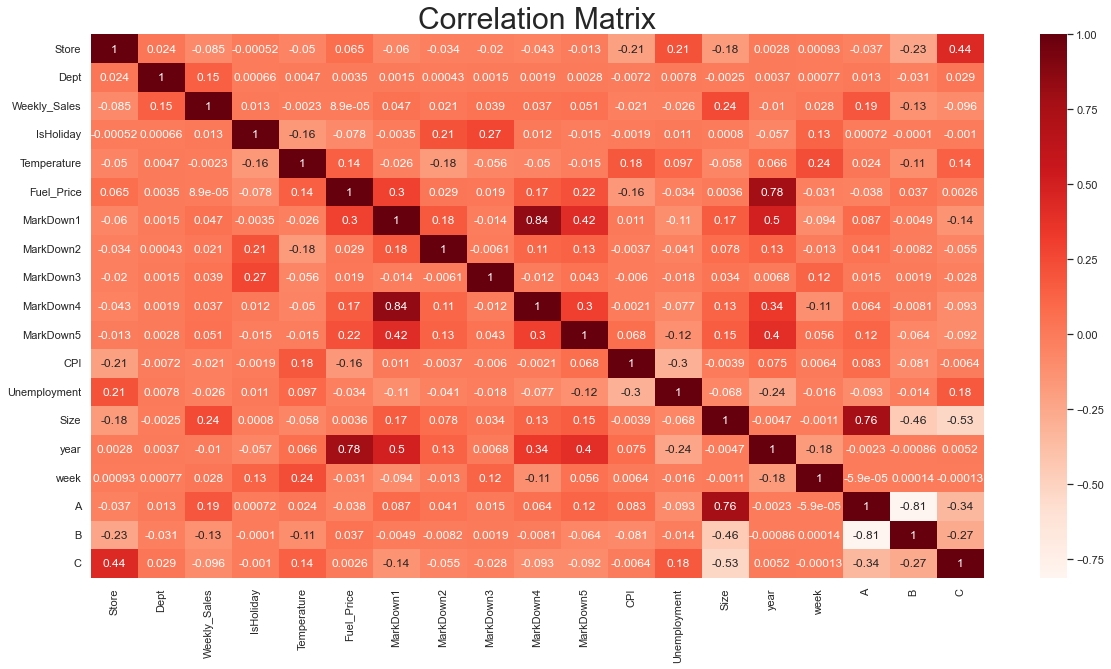

In [30]:
# correlation Matrix:

sns.set(style='white')
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

### _Insights:_

* Department, Store size and Type have moderate correlation with the weekly sales
* Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out
* Temperature. Fuel price, CPI and Unemployment are very weakly correlated with the weekly sales
* IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks

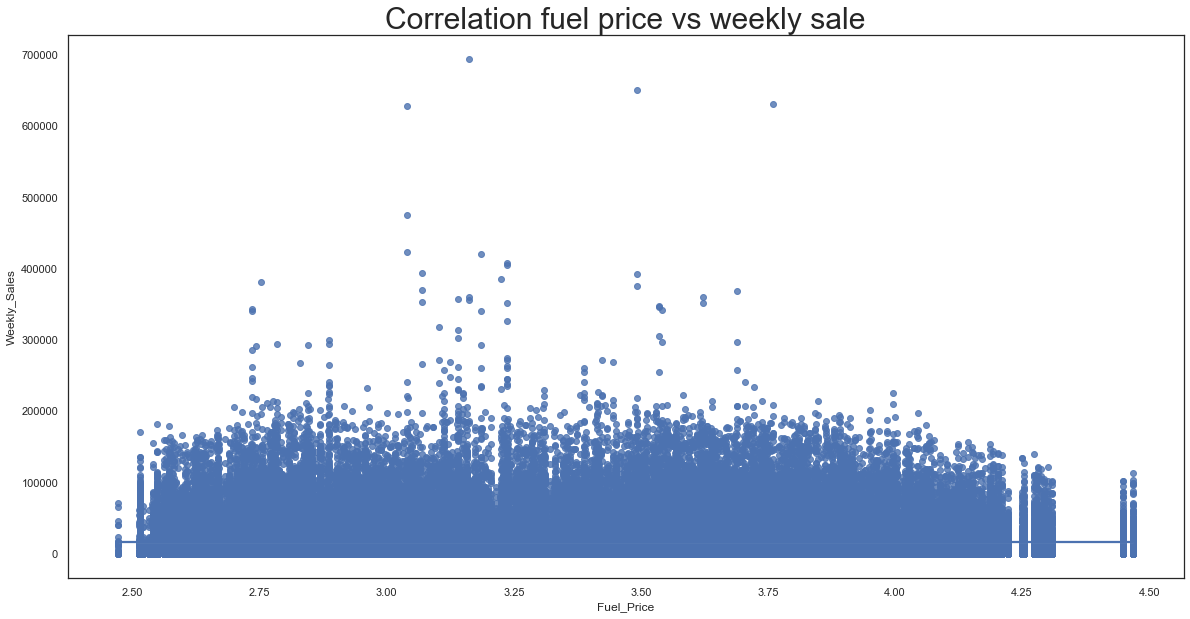

In [32]:
# correlation between fuel price and weekly sales price:

sns.set(style='white')
plt.figure(figsize=(20,10))
sns.regplot(data = train, x='Fuel_Price',y='Weekly_Sales')
plt.title('Correlation fuel price vs weekly sale', fontsize=30);

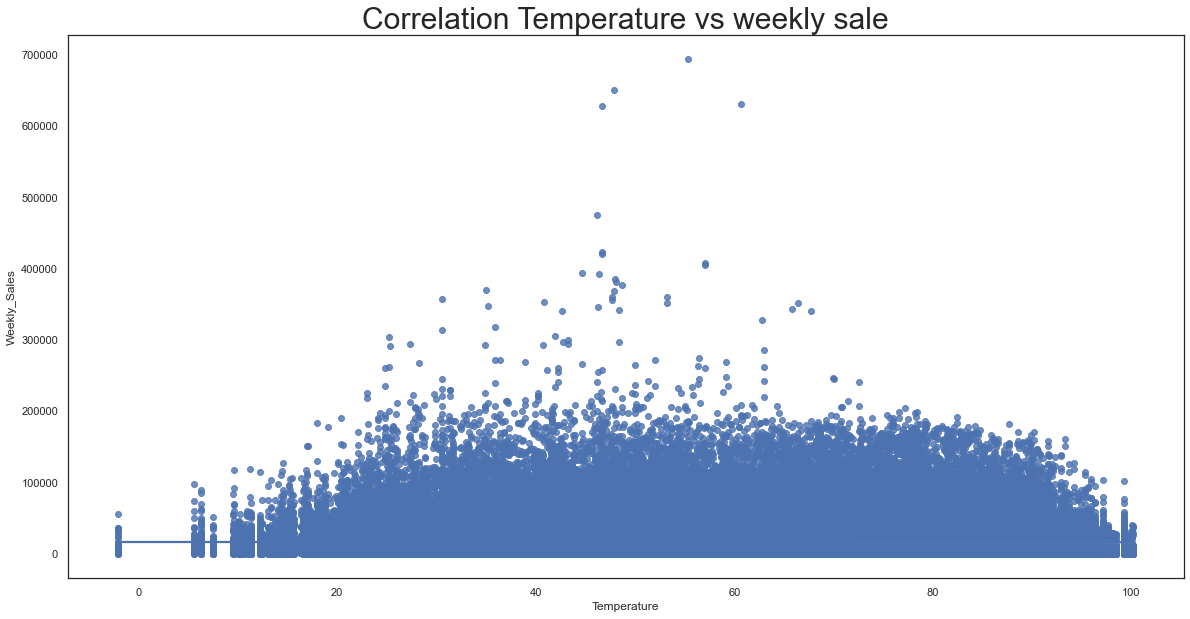

In [33]:
# correlation between Temperature and weekly sales price:

sns.set(style='white')
plt.figure(figsize=(20,10))
sns.regplot(data=train, x='Temperature',y='Weekly_Sales')
plt.title('Correlation Temperature vs weekly sale', fontsize=30);

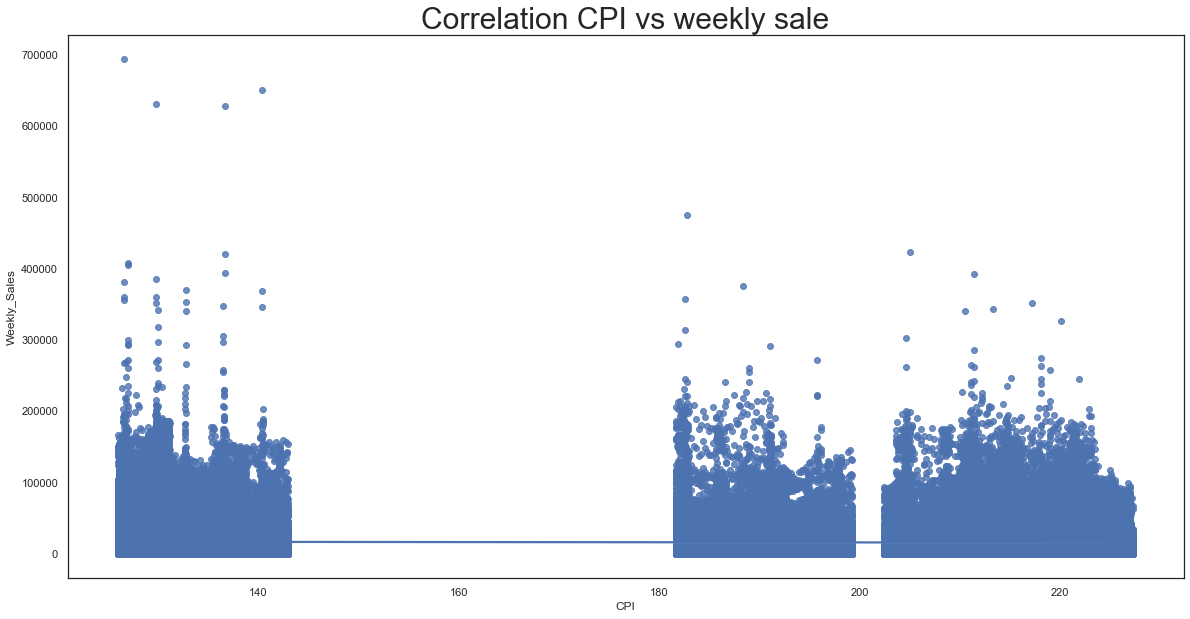

In [34]:
# correlation between CPI and weekly sales price:

sns.set(style='white')
plt.figure(figsize=(20,10))
sns.regplot(data=train, x='CPI',y='Weekly_Sales')
plt.title('Correlation CPI vs weekly sale', fontsize=30);

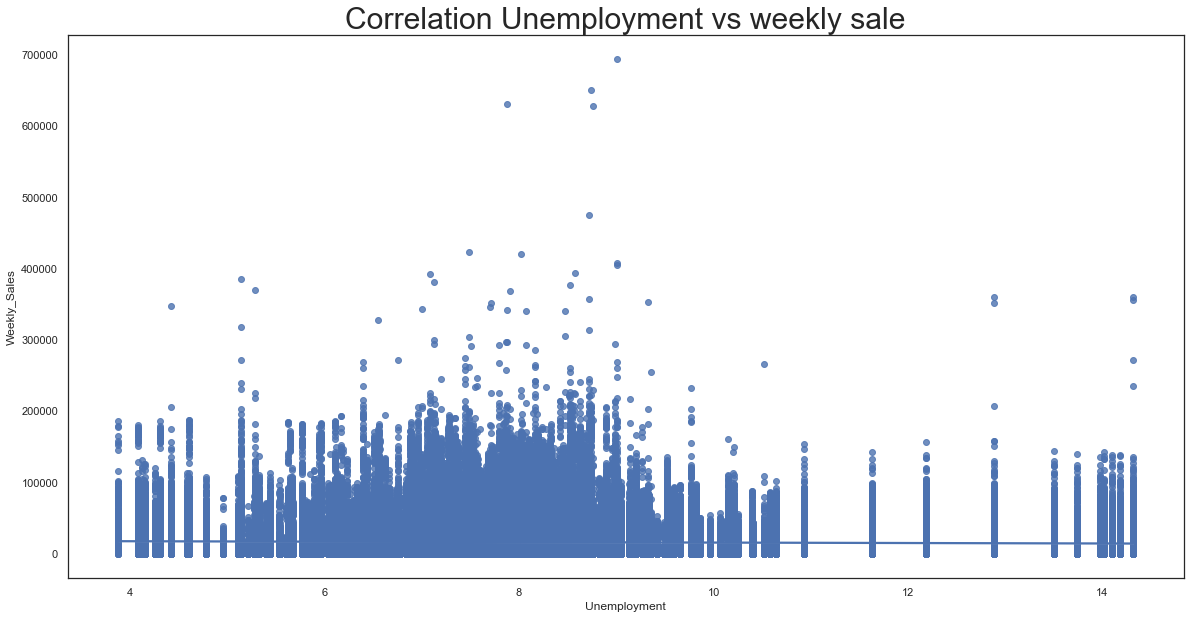

In [36]:
# correlation between Unemployment and weekly sales price:

sns.set(style='white')
plt.figure(figsize=(20,10))
sns.regplot(data=train, x='Unemployment',y='Weekly_Sales')
plt.title('Correlation Unemployment vs weekly sale', fontsize=30);

### _Insights:_


In [37]:
# remove markdown features from the datasets

train = train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Type'],axis=1)


train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,year,week,A,B,C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,151315,2010,5,1,0,0
1,35,3,2010-02-05,14612.19,False,27.19,2.784,135.352461,9.262,103681,2010,5,0,1,0


## Modeling:

* Prepare data for modeling by changing them to numeric
* import appropriate packages to convert data to same scale , split data and train model
* Train and evaluate models/ML algorithms on training data
* tune the hyperparameter if required
* evaluate the model

### ML Algorithms used to train the models:- 

Following ML algorithms will be used to train the model

* KNN Regressor
* Decision Tree
* Random Forest
* Gradient Boosting Machine
* ARIMA - Auto Regressive Integrated Moving Average

In [38]:
#  assign the train and test data

X = train.drop(['Date','Weekly_Sales'],axis=1)
X.head()

y = train['Weekly_Sales'].values

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,year,week,A,B,C
0,1,1,False,42.31,2.572,211.096358,8.106,151315,2010,5,1,0,0
1,35,3,False,27.19,2.784,135.352461,9.262,103681,2010,5,0,1,0
2,35,4,False,27.19,2.784,135.352461,9.262,103681,2010,5,0,1,0
3,35,5,False,27.19,2.784,135.352461,9.262,103681,2010,5,0,1,0
4,35,6,False,27.19,2.784,135.352461,9.262,103681,2010,5,0,1,0


In [39]:
# split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Standardize the train data & test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#### Training on different Algorithms:

#### 1. KNN Regressor:

In [41]:
# import required packages and create knn instance

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)

knn.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=10)

In [42]:
# predict the targets based on knn model

y_pred = knn.predict(X_test)

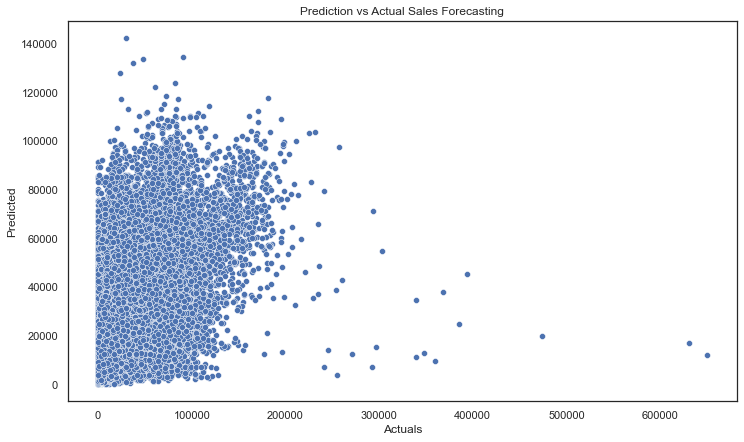

In [43]:
# plot the predictions vs actuals using scatter plot

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=y_test,y=y_pred)
plt.title('Prediction vs Actual Sales Forecasting')
plt.ylabel('Predicted')
plt.xlabel('Actuals');

#### _Insights:_

Based on above scatter plpoat we see that predicted weekly sales and actual weekly sales are correlating to each other but still not perfect linearly correlated, few data points are deviating from the linear line but those could be outliers.

## Evaluation:

All the trained models will be tested using different evaluation matrix and based on better score the model will be baselined.

In [44]:
# evaluate the knn model

knn_mae = mean_absolute_error(y_test,y_pred)
knn_mse = mean_squared_error(y_test,y_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"The Mean Absolute Error: {knn_mae}")
print(f"The Mean Squared Error: {knn_mse}")
print(f"The Root Mean Squared Error: {knn_rmse}")

The Mean Absolute Error: 11340.057141999303
The Mean Squared Error: 339131021.38814723
The Root Mean Squared Error: 18415.510348294647


In [45]:
# calculate the accuracy of the model

knn_accuracy = knn.score(X_test,y_test)

print(f"The Accuracy of the Model is: {knn_accuracy}")

The Accuracy of the Model is: 0.3412092958869555


#### 2. Decision Tree Regressor:

In [46]:
# import required packages and create knn instance

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
# predict the targets based on knn model

y_pred = dtr.predict(X_test)

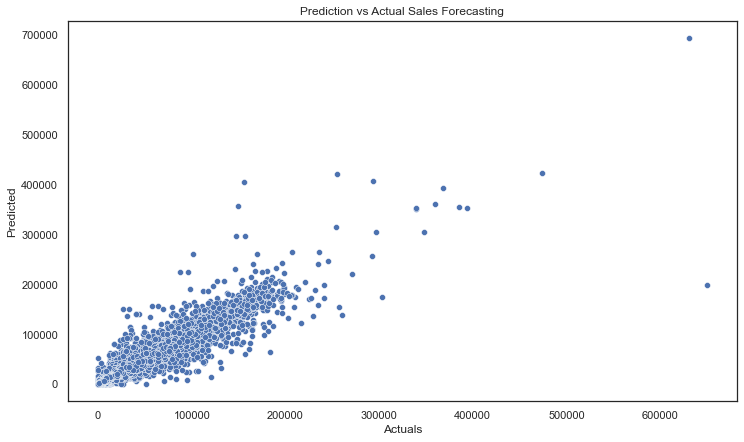

In [48]:
# plot the predictions vs actuals using scatter plot

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=y_test,y=y_pred)
plt.title('Prediction vs Actual Sales Forecasting')
plt.ylabel('Predicted')
plt.xlabel('Actuals');

#### _Insights:_

Based on above scatter plpot we see that predicted weekly sales and actual weekly sales are almost same, are following linear collinearity. Almost perfect straight line, few data points are deviating from the line but those could be outliers.


## Evaluation:

All the trained models will be tested using different evaluation matrix and based on better score the model will be baselined.


In [49]:
# evaluate the dtr model

dtr_mae = mean_absolute_error(y_test,y_pred)
dtr_mse = mean_squared_error(y_test,y_pred)
dtr_rmse = np.sqrt(dtr_mse)

print(f"The Mean Absolute Error: {dtr_mae}")
print(f"The Mean Squared Error: {dtr_mse}")
print(f"The Root Mean Squared Error: {dtr_rmse}")

The Mean Absolute Error: 1875.6541431336466
The Mean Squared Error: 23982179.291865516
The Root Mean Squared Error: 4897.160329401674


In [50]:
# calculate the accuracy of the model

dtr_accuracy = dtr.score(X_test,y_test)

print(f"The Accuracy of the Model is: {dtr_accuracy}")

The Accuracy of the Model is: 0.9534125875091486


#### 3. Random Forest Regressor:

In [51]:
# import required packages and create rfr instance

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1)

rfr.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [52]:
# predict the targets based on rfr model

y_pred = rfr.predict(X_test)

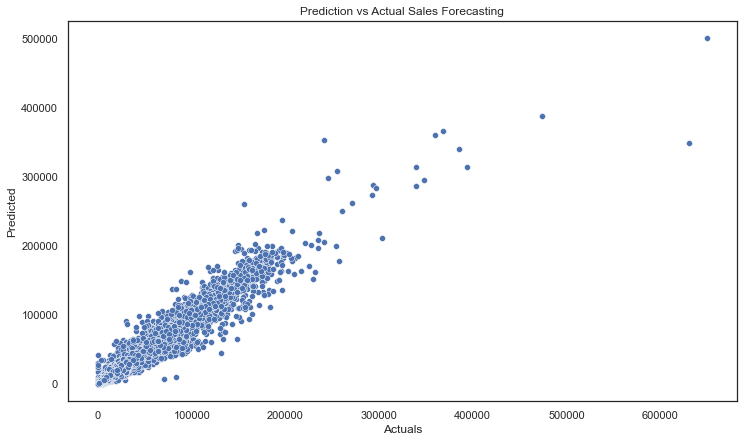

In [53]:
# plot the predictions vs actuals using scatter plot

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=y_test,y=y_pred)
plt.title('Prediction vs Actual Sales Forecasting')
plt.ylabel('Predicted')
plt.xlabel('Actuals');

#### _Insights:_

Similar to Dicision Tree classifier, the scatter plpot we see that predicted weekly sales and actual weekly sales are almost same, are following linear collinearity. Almost perfect straight line, few data points are deviating from the line but those could be outliers.

## Evaluation:

All the trained models will be tested using different evaluation matrix and based on better score the model will be baselined.

In [54]:
# evaluate the rfr model

rfr_mae = mean_absolute_error(y_test,y_pred)
rfr_mse = mean_squared_error(y_test,y_pred)
rfr_rmse = np.sqrt(rfr_mse)

print(f"The Mean Absolute Error: {rfr_mae}")
print(f"The Mean Squared Error: {rfr_mse}")
print(f"The Root Mean Squared Error: {rfr_rmse}")


The Mean Absolute Error: 1445.2261385002857
The Mean Squared Error: 12311651.465370353
The Root Mean Squared Error: 3508.796298642934


In [55]:
# calculate the accuracy of the model

rfr_accuracy = rfr.score(X_test,y_test)

print(f"The Accuracy of the Model is: {rfr_accuracy}")

The Accuracy of the Model is: 0.9760835752964556


#### 4. XGBoost Regressor:

In [56]:
# import required packages and create xgb_reg instance

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=2800,learning_rate=0.1, n_jobs=-1)

xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2800, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
# predict the targets based on xgb_reg model

y_pred = xgb_reg.predict(X_test)

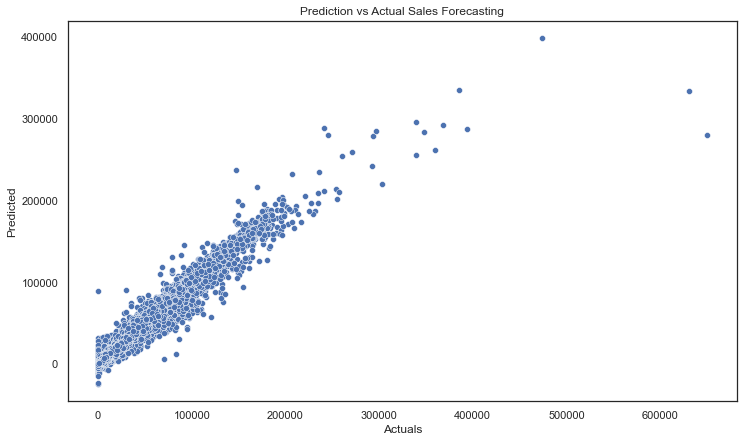

In [58]:
# plot the predictions vs actuals using scatter plot

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=y_test,y=y_pred)
plt.title('Prediction vs Actual Sales Forecasting')
plt.ylabel('Predicted')
plt.xlabel('Actuals');

#### _Insights:_

Based on above scatter plpot we see that predicted weekly sales and actual weekly sales are almost same. A perfect straight line, few data points are deviating from the line but those could be outliers.

## Evaluation:

All the trained models will be tested using different evaluation matrix and based on better score the model will be baselined.

In [59]:
# evaluate the xgb_reg model

xgb_reg_mae = mean_absolute_error(y_test,y_pred)
xgb_reg_mse = mean_squared_error(y_test,y_pred)
xgb_reg_rmse = np.sqrt(xgb_reg_mse)

print(f"The Mean Absolute Error: {xgb_reg_mae}")
print(f"The Mean Squared Error: {xgb_reg_mse}")
print(f"The Root Mean Squared Error: {xgb_reg_rmse}")

The Mean Absolute Error: 1717.7311352764148
The Mean Squared Error: 11996572.747814815
The Root Mean Squared Error: 3463.606898569007


In [60]:
# calculate the accuracy of the model

xgb_reg_accuracy = xgb_reg.score(X_test,y_test)

print(f"The Accuracy of the Model is: {xgb_reg_accuracy}")

The Accuracy of the Model is: 0.9766956423652239


#### 5. Auto ARIMA (Auto Regressive Integrated Moving Average):

In [80]:
# import required packages

from statsmodels.tsa.stattools import adfuller
import pmdarima
from pmdarima.arima import auto_arima

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Date'>

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Date'>

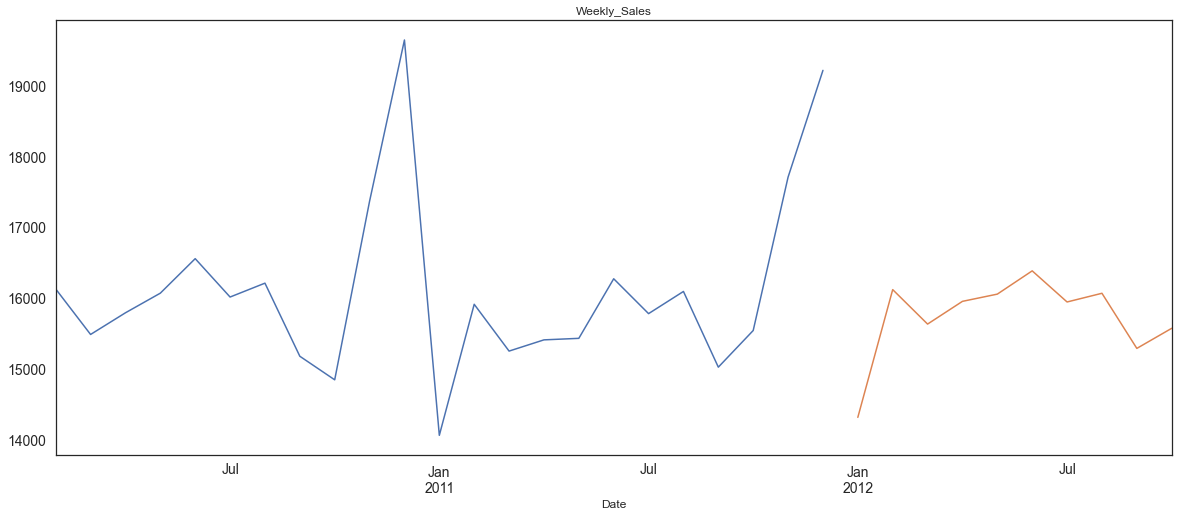

In [68]:
# change the date format and resample the data

data=train
data.Date = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data.Date
data = data.drop('Date', axis=1)
data = data.resample('MS').mean() # Resmapling the time series data with month starting first.

# Train-Test splitting of time series data
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]

# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [69]:
# The time series models assume that the given time-series data set in stationary meaning it has got the constant mean 
# and constant variance.


result = adfuller(data['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.176090625639755
p-value: 0.0007230683876533348
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


#### _Insights:_

As we can see that our p-value is definitely less than 0.5 and is even less than 0.01 so we can say with pretty good confidence that we can reject the null (unit root, non-stationary data) and can assume our data is stationary. Additionally, our ADF is much less than our 1% confidence value of -3.43, so we have another confirmation that we can reject the null hypothesis.

In [81]:
# Applying auto_arima model on train data.

model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.552, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=398.006, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.825, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=399.582, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.067, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=401.719, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.216 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.006, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.582, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=405.689, Time=0.11 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.825, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.7

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

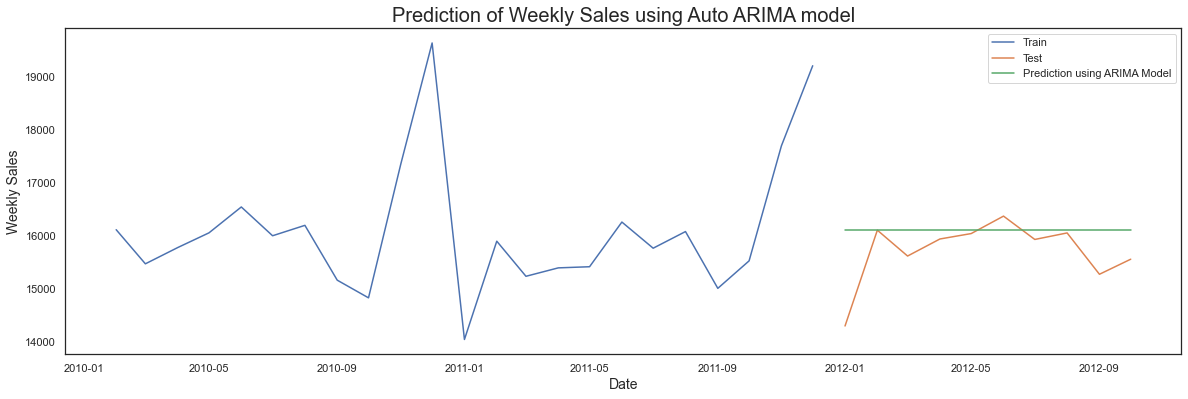

In [83]:
# Predicting the test values using predict function.

forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show();

## Evaluation:

All the trained models will be tested using different evaluation matrix and based on better score the model will be baselined.

In [87]:
# Performance metric for ARIMA model -MSE/RMSE

arima_mae = mean_absolute_error(test_data,forecast)
arima_mse = mean_squared_error(test_data, forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f"The Mean Absolute Error: {arima_mae}")
print(f"The Mean Squared Error: {arima_mse}")
print(f"The Root Mean Squared Error: {arima_rmse}")

The Mean Absolute Error: 447.86002566726785
The Mean Squared Error: 470740.21149498934
The Root Mean Squared Error: 686.105102367698


## Model Result Comparison:

In [88]:
# create df with all model results

result = {'Models':['KNN Regressor','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor','ARIMA'],
          'MAE':[knn_mae,dtr_mae,rfr_mae,xgb_reg_mae,arima_mae],
           'RMSE':[knn_rmse,dtr_rmse,rfr_rmse,xgb_reg_rmse,arima_rmse],
            'Accuracy':[knn_accuracy,dtr_accuracy,rfr_accuracy,xgb_reg_accuracy,'NA']}

pd.DataFrame(result)

,Models,MAE,RMSE,Accuracy
0,KNN Regressor,11340.057142,18415.510348,0.341209
1,Decision Tree Regressor,1875.654143,4897.160329,0.953413
2,Random Forest Regressor,1445.226139,3508.796299,0.976084
3,XGBoost Regressor,1717.731135,3463.606899,0.976696
4,ARIMA,447.860026,686.105102,NA


#### _Insights:_

From above table, we see that the Root Mean Squared Error for model XGBoost is lowest among all other models and Accuracy score is also best compared to other models accuracy score.

Based on this we can baseline our model which is XBGBoost regressor with highest accuracy score and lowest loss.

# END